# Data Visualization

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import datasets 


rd = pd.read_csv('Factors Affecting Bangladeshi University Students Academic Performance - Copy.csv', delimiter=',');
rd[:10]


,Age,Gender,Current Academic Year,Current CGPA,most important 2 factors,stress level,experience test anxiety,important to attend class,times of interaction with teacher inside classroom,prefered study time,feel family pressure,dating someone has effect,Study routine,participate in extra-curricular activities,part time job
0,23,Female,Fourth Year,3.7,"Time management, Study habits",3,Yes,Yes,5,Early Morning,No,Yes,I study regularly/Weekly.,Yes,NaN
1,24,Female,Fourth Year,3.7,"Time management, Study habits",4,Yes,Yes,5,Early Morning,No,Yes,I study only on the exam week.,Yes,Tuition
2,23,Male,Third year,3.1,"Time management, Teacher quality",3,Yes,Yes,1,Late Night,No,No,I study only before the exam night.,Yes,NaN
3,21,Female,Fourth Year,2.7,"Time management, Study habits",4,Yes,No,4,Late Night,Yes,No,I study only on the exam week.,Yes,Tuition
4,23,Male,Third year,3.3,"Time management, Study habits",4,No,No,1,Late Night,No,No,I study only on the exam week.,No,"Part Time Job, Business / Freelancing"
5,23,Female,Fourth Year,2.7,"Study habits, Teacher quality",4,Yes,Yes,2,Late Night,No,Yes,I study only before the exam night.,Yes,Part Time Job
6,24,Male,Third year,3.4,"Time management, Study habits",4,Yes,Yes,4,Late Night,Yes,Yes,I study regularly/Weekly.,Yes,Tuition
7,23,Male,Third year,2.6,"Study habits, Teacher quality",5,Yes,Yes,2,Late Night,Yes,No,I study only on the exam week.,Yes,Business / Freelancing
8,21,Male,First Year,3.0,"Time management, Study habits",3,Yes,Yes,5,Late Night,No,Yes,I study only before the exam night.,Yes,Tuition
9,20,Female,First Year,3.3,"Teacher quality, Family support",4,Yes,Yes,5,Early Morning,Yes,No,I study only on the exam week.,Yes,NaN


In [44]:
rd.describe()

,Age,Current CGPA,stress level,times of interaction with teacher inside classroom
count,418.000000,418.000000,418.000000,418.000000
mean,22.239234,3.347847,3.916268,2.791866
std,1.823163,0.395184,0.952177,1.322098
min,18.000000,2.000000,1.000000,1.000000
25%,21.000000,3.100000,3.000000,2.000000
50%,22.000000,3.400000,4.000000,3.000000
75%,23.000000,3.700000,5.000000,4.000000
max,30.000000,4.000000,5.000000,5.000000


# The bellow section reflects the scatterplot distribution of the combination of each attribute. The diagonal kdeplot reflects the distribution of each attributes marking of different classes of students

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


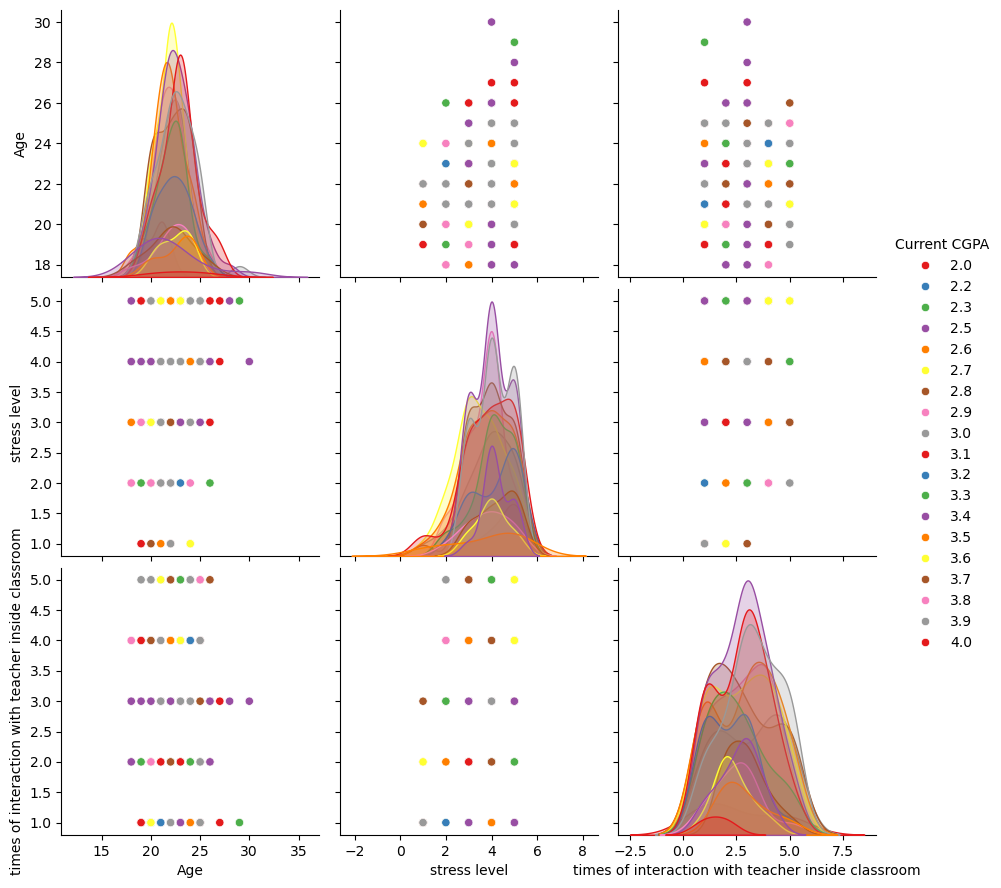

In [45]:
# sb.pairplot(rd,hue='Current CGPA',palette='Set1',height=3);
sb.pairplot(rd, hue ='Current CGPA', palette='Set1',height=3)
plt.show()

# The bellow histogram also shows the distribution in discrete format

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Current CGPA'}>],
       [<Axes: title={'center': 'stress level'}>,
        <Axes: title={'center': 'times of interaction with teacher inside classroom'}>]],
      dtype=object)

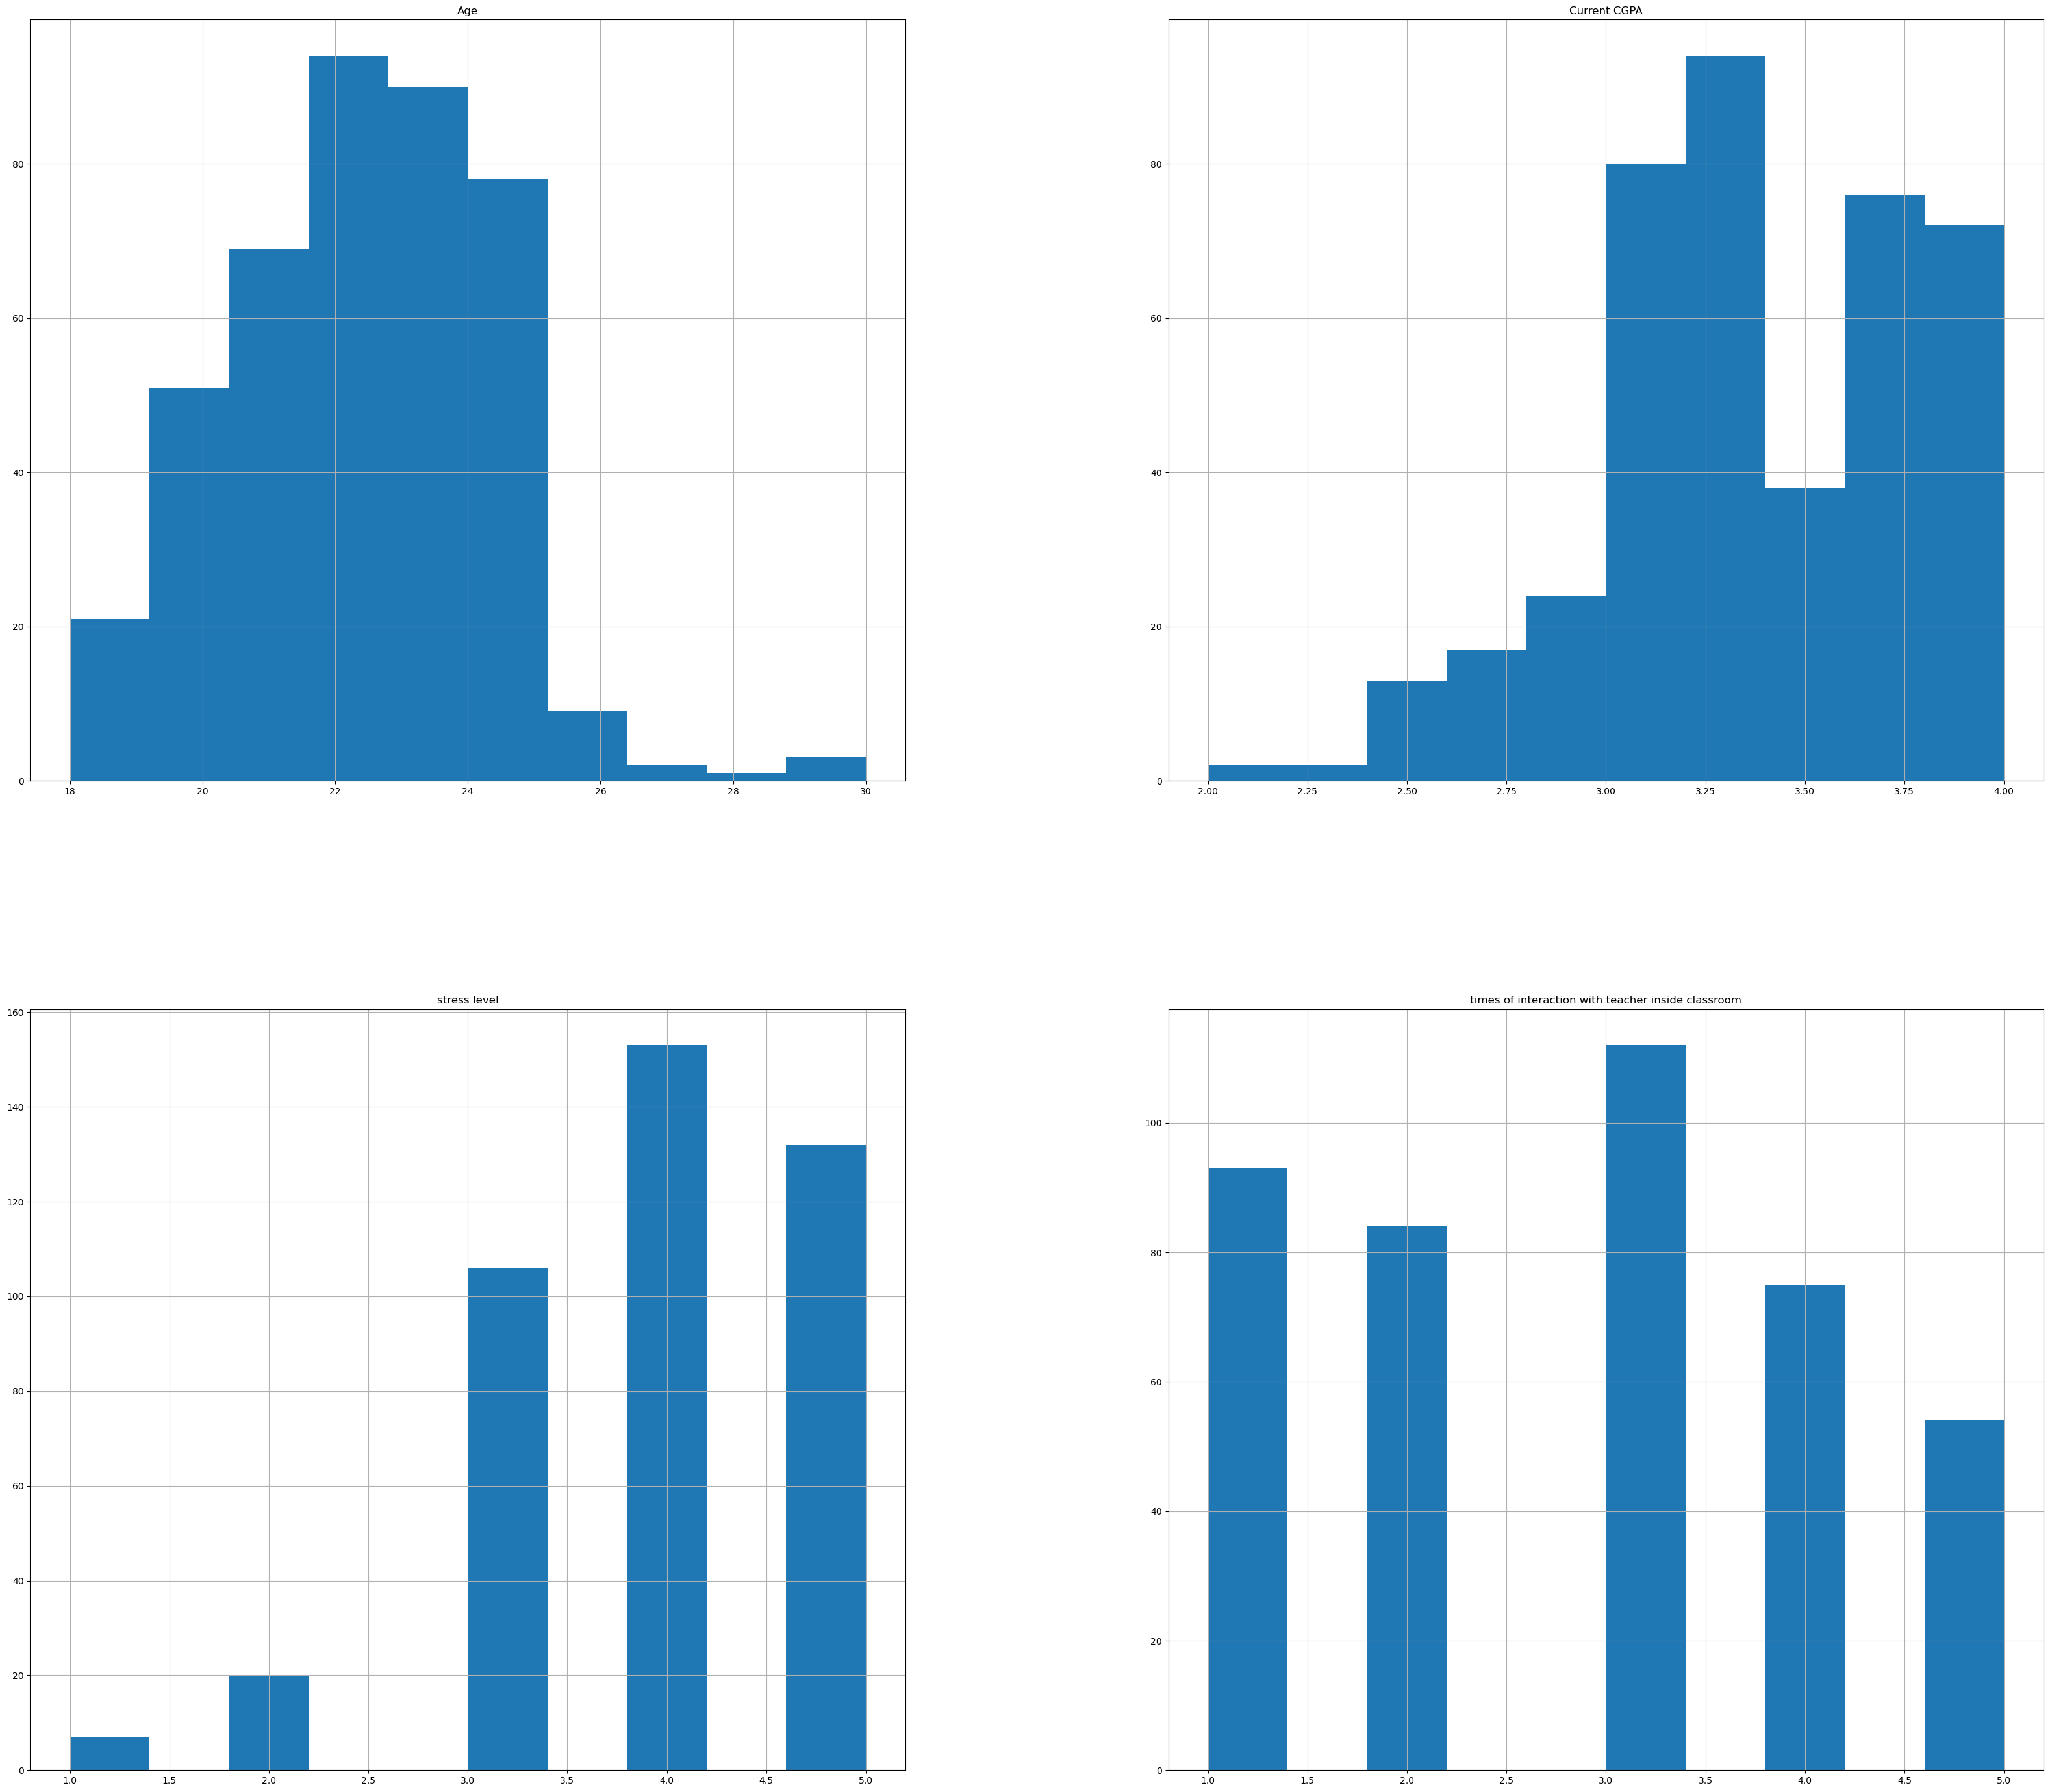

In [110]:
rd.hist(figsize=(40, 35))

*In the above histogram, X-axis defines the frequency number of a student's activity on a particular attribute and Y-axis defines the count. The histogram shows that -*
The histogram shows that -*
•	Majority students stress level is very high.
•	Majority of the students are less eager to interact with teacher during class.



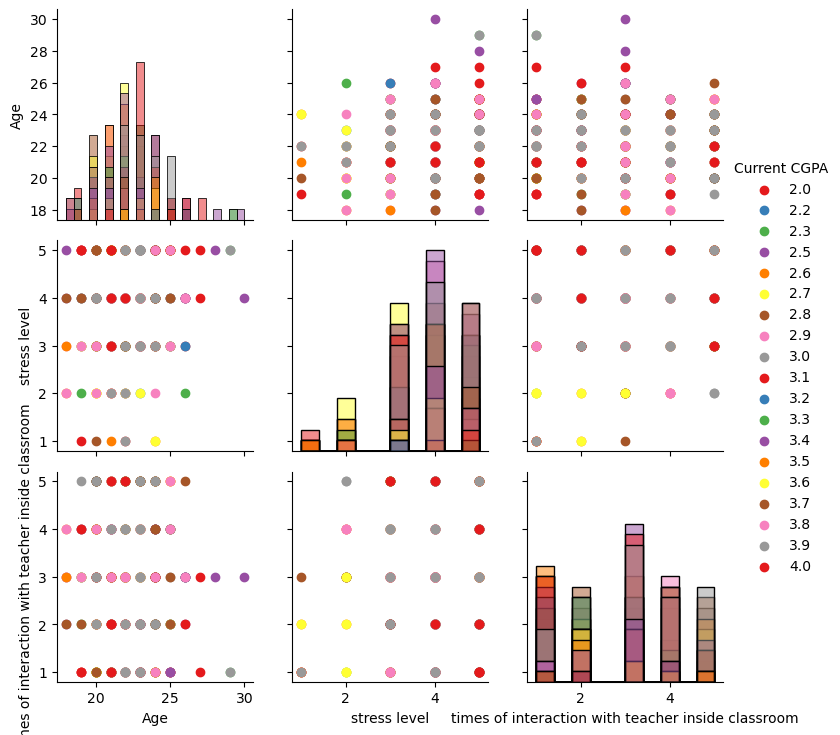

In [47]:
# g = sb.PairGrid(rd, hue="Current CGPA",palette='Set1')
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend();
g = sb.PairGrid(rd, hue="Current CGPA", palette='Set1')
g.map_diag(sb.histplot)  
g.map_offdiag(plt.scatter)
g.add_legend()

# From the above plot, it is quite a lot clear to see that Hige and Low CGPA students are distinguishable in every combination of pair plot but Medium level students are scattered in almost everywhere and mixed up.

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


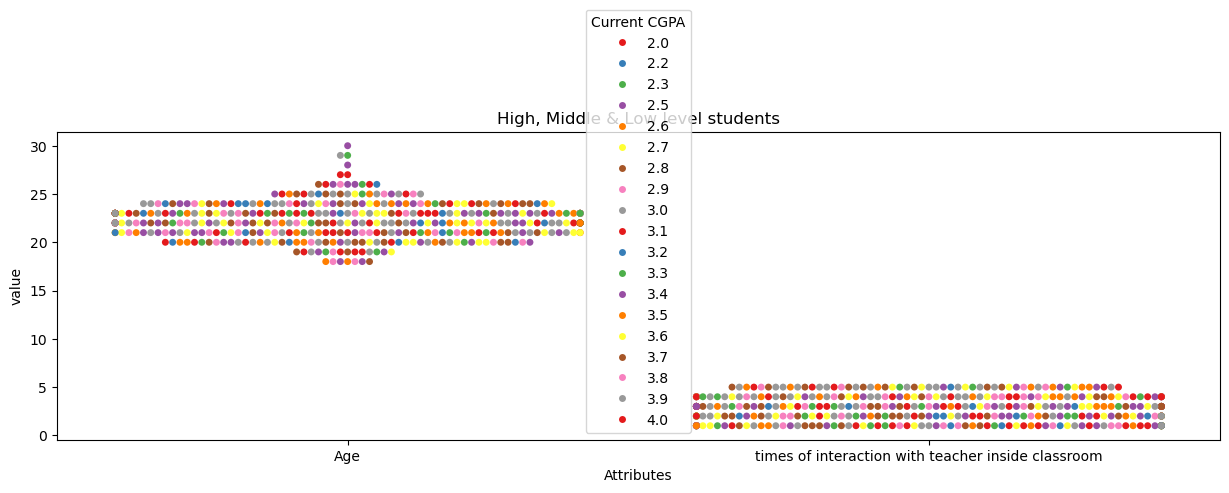

In [49]:
melt = pd.melt(rd,id_vars='Current CGPA',value_vars=['Age','times of interaction with teacher inside classroom'])
plt.rcParams['figure.figsize']=(15,4)
sb.swarmplot(x='variable',y='value',hue='Current CGPA' , data=melt,palette='Set1')
#plt.ylabel('Values from 0 to 4')
plt.xlabel('Attributes')
plt.title('High, Middle & Low level students');

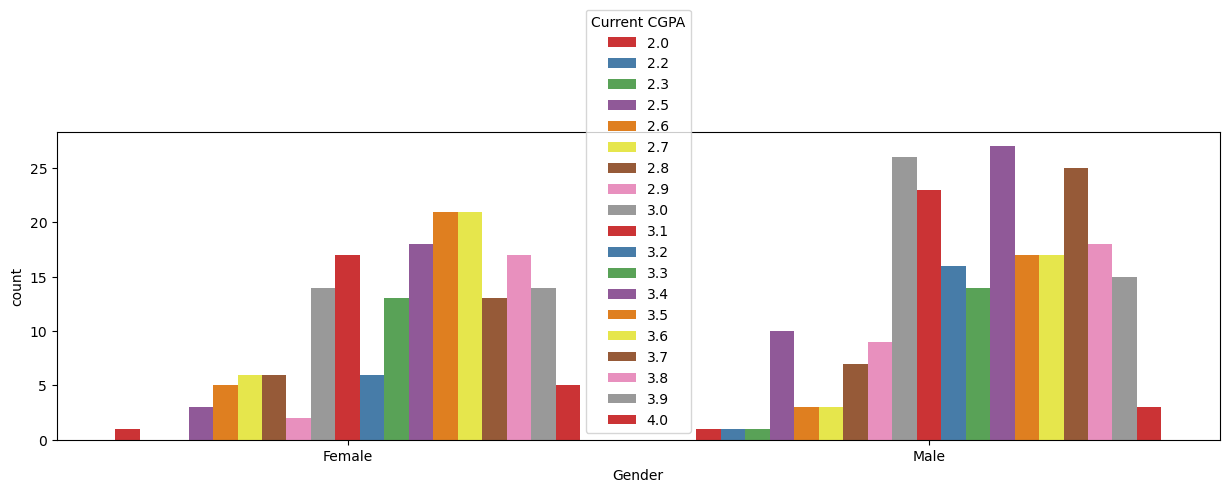

In [50]:
sb.countplot(data=rd,x='Gender',hue='Current CGPA',palette='Set1');

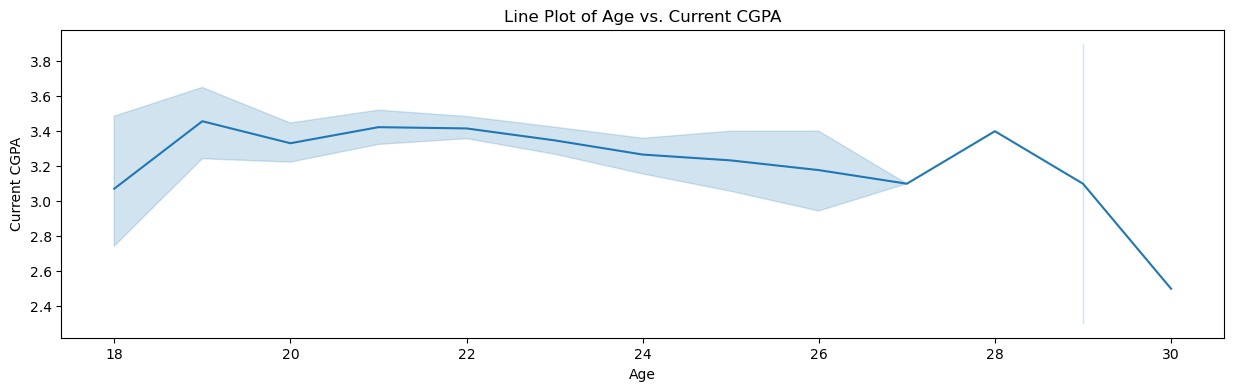

In [130]:
selected_columns = rd[['Age', 'Current CGPA']].copy()
selected_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create the line plot
sb.lineplot(x="Age", y="Current CGPA", data=selected_columns)

# Display the plot
plt.xlabel("Age")
plt.ylabel("Current CGPA")
plt.title("Line Plot of Age vs. Current CGPA")
plt.show()

In [85]:
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

In [86]:
categorical_columns = ['prefered study time','feel family pressure','Study routine']
le = LabelEncoder()

X = rd.drop(['Gender','Current Academic Year', 'most important 2 factors','experience test anxiety','prefered study time','feel family pressure','Study routine','Current CGPA','important to attend class','participate in extra-curricular activities', 'part time job', 'dating someone has effect'],axis=1)
y = rd['Current CGPA']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 3)
(84, 3)
(334,)
(84,)


In [88]:
X.head(5)

,Age,stress level,times of interaction with teacher inside classroom
0,23,3,5
1,24,4,5
2,23,3,1
3,21,4,4
4,23,4,1


# Train, Validation, Test dataset

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [116]:
df = rd.drop(['Gender','Current Academic Year', 'most important 2 factors','experience test anxiety','prefered study time','feel family pressure','Study routine','important to attend class','participate in extra-curricular activities', 'part time job', 'dating someone has effect'],axis=1);

In [117]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [118]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [93]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(84, 3)
(320,)
(84,)


In [111]:
X.columns

Index(['Age', 'stress level',
       'times of interaction with teacher inside classroom'],
      dtype='object')

# KNN

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [97]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn_model.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.16      0.27      0.20        15
           2       0.20      0.27      0.23        15
           3       0.25      0.19      0.22        26
           4       0.10      0.06      0.08        16
           5       0.33      0.25      0.29        12

    accuracy                           0.20        84
   macro avg       0.21      0.21      0.20        84
weighted avg       0.21      0.20      0.20        84



# Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [102]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.17      0.13      0.15        15
           2       0.22      0.13      0.17        15
           3       0.39      0.35      0.37        26
           4       0.33      0.12      0.18        16
           5       0.26      0.75      0.39        12

    accuracy                           0.29        84
   macro avg       0.28      0.30      0.25        84
weighted avg       0.29      0.29      0.26        84



# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [105]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.06      0.07      0.06        15
           2       0.10      0.07      0.08        15
           3       0.38      0.35      0.36        26
           4       0.00      0.00      0.00        16
           5       0.17      0.42      0.24        12

    accuracy                           0.19        84
   macro avg       0.14      0.18      0.15        84
weighted avg       0.17      0.19      0.17        84



# SVM

In [106]:
from sklearn.svm import SVC

In [107]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [108]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.22      0.33      0.26        15
           2       0.18      0.27      0.22        15
           3       0.19      0.12      0.14        26
           4       0.18      0.12      0.15        16
           5       0.17      0.17      0.17        12

    accuracy                           0.19        84
   macro avg       0.19      0.20      0.19        84
weighted avg       0.19      0.19      0.18        84



# Decision Tree

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def Results(clf):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print ("Classifier: ", clf)
    print ('Train Accuracy: ', "{:.3f}".format(accuracy_score(y_train, clf.predict(X_train))))
    print ('Test Accuracy: ', "{:.3f}".format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    print('─' * 60)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(criterion = 'gini')
dt2 = DecisionTreeClassifier(criterion = 'entropy')
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
classifiers = [dt, dt2, rf, knn]
for clf in classifiers:
    Results(clf)

Classifier:  DecisionTreeClassifier()
Train Accuracy:  0.819
Test Accuracy:  0.179
              precision    recall  f1-score   support

           1       0.17      0.27      0.21        15
           2       0.14      0.20      0.16        15
           3       0.26      0.19      0.22        26
           4       0.17      0.12      0.14        16
           5       0.12      0.08      0.10        12

    accuracy                           0.18        84
   macro avg       0.17      0.17      0.17        84
weighted avg       0.19      0.18      0.18        84

────────────────────────────────────────────────────────────
Classifier:  DecisionTreeClassifier(criterion='entropy')
Train Accuracy:  0.819
Test Accuracy:  0.226
              precision    recall  f1-score   support

           1       0.12      0.20      0.15        15
           2       0.17      0.20      0.18        15
           3       0.27      0.23      0.25        26
           4       0.42      0.31      0.36     

In [129]:
dt.feature_importances_

array([0.36526337, 0.33140667, 0.30332995])